In [24]:
from src.utils.image_processing import image_diff
import numpy as np
import cv2
from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

In [25]:
def low_fltr(img, freq, thresh):
    def lpf(a):
        lpf_f = processor.reflect_lpf(processor.lpf(freq, 1, 32))
        return np.convolve(a, lpf_f, 'same')
    
    fltr_img = np.apply_along_axis(lpf, 0, np.apply_along_axis(lpf, 1, img))
    # return fltr_img
    return cv2.threshold(fltr_img, thresh, 255, cv2.THRESH_BINARY)[1]
    
def high_fltr(img, freq,thresh):
    def hpf(a):
        hpf_f = processor.hpf(freq, 1, 32)
        return np.convolve(a, hpf_f, 'same')
    
    fltr_img = np.apply_along_axis(hpf, 0, np.apply_along_axis(hpf, 1, img))
    # return fltr_img
    return cv2.threshold(fltr_img, thresh, 255, cv2.THRESH_BINARY)[1]
    

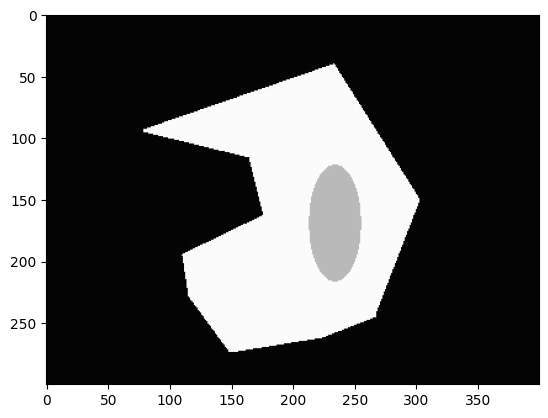

In [26]:
img = inout.read_jpg(img_path+'MODELimage.jpg')
inout.show_jpg(img)

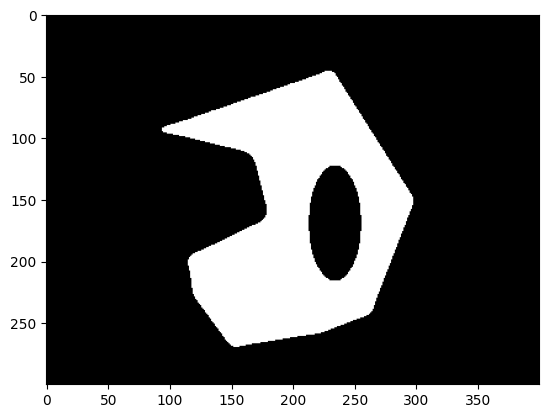

In [27]:
low_img = low_fltr(img, 0.05, 200) # ???
inout.show_jpg(low_img)

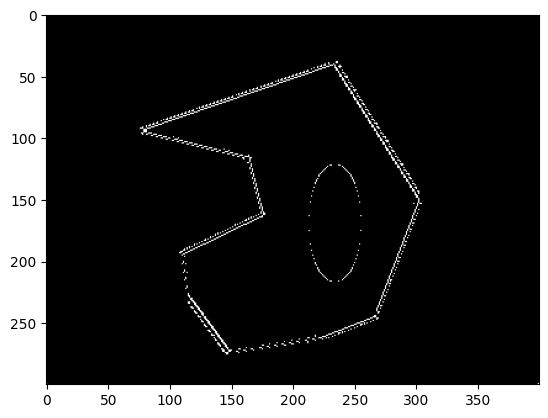

In [28]:
high_img = high_fltr(img, 0.1, 10)  # ???
inout.show_jpg(high_img)

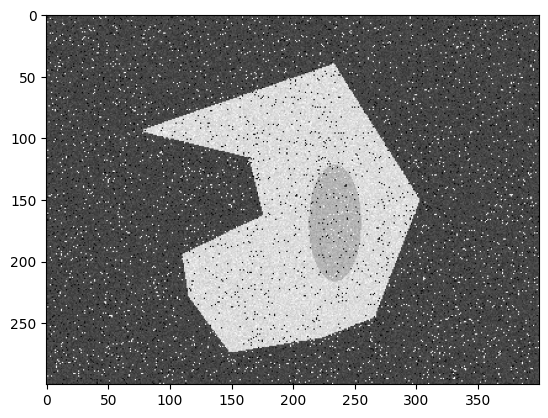

In [29]:
img = inout.read_jpg(img_path+'mixed_MODELimage.jpg')
inout.show_jpg(img)

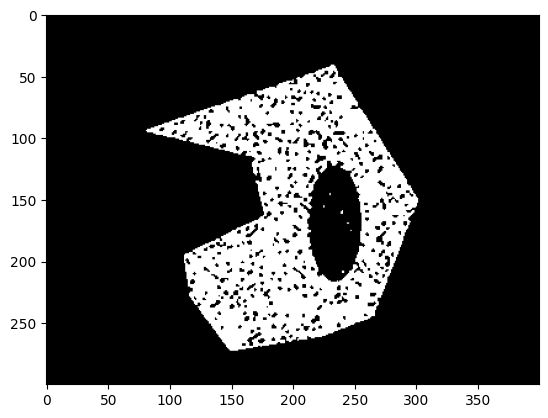

In [30]:
low_img = low_fltr(img, 0.2, 200) # ???
inout.show_jpg(low_img)

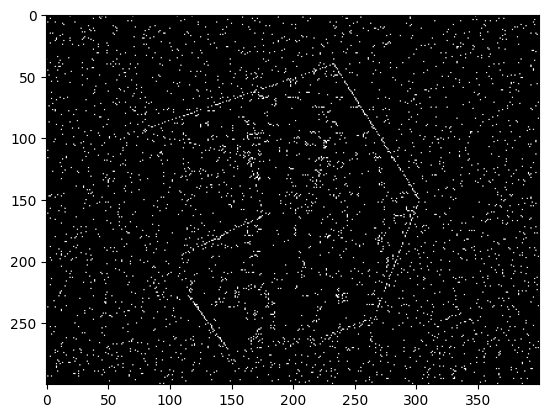

In [31]:
high_img = high_fltr(img, 0.1, 40)  # ???
inout.show_jpg(high_img)

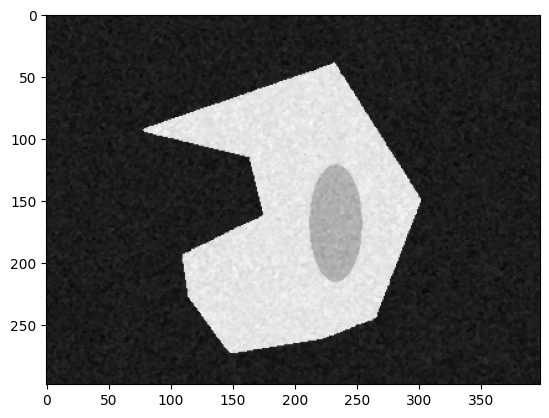

In [32]:
img = inout.read_jpg(img_path+'mixed_median_MODELimage.jpg')
inout.show_jpg(img)

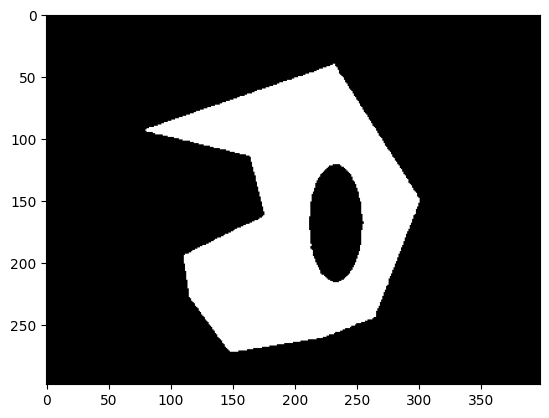

In [33]:
low_img = low_fltr(img, 0.2, 200) # ???
inout.show_jpg(low_img)

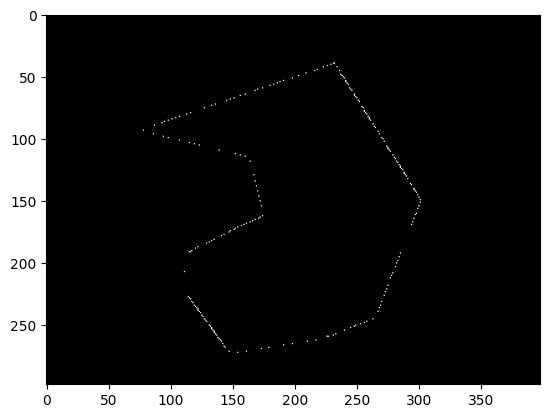

In [34]:
high_img = high_fltr(img, 0.1, 40)  # ???
inout.show_jpg(high_img)

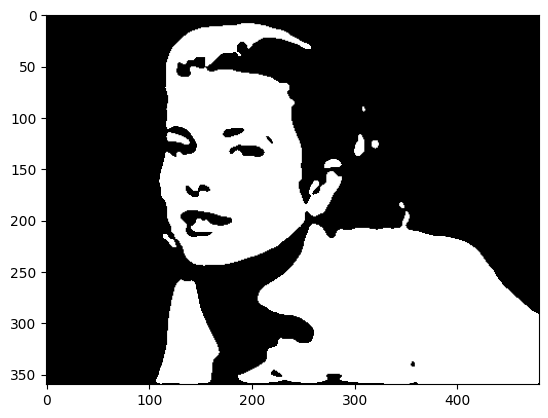

In [37]:
img = inout.read_jpg(img_path+'grace.jpg')
low_img = low_fltr(img, 0.1, 100) # ???
inout.show_jpg(low_img)

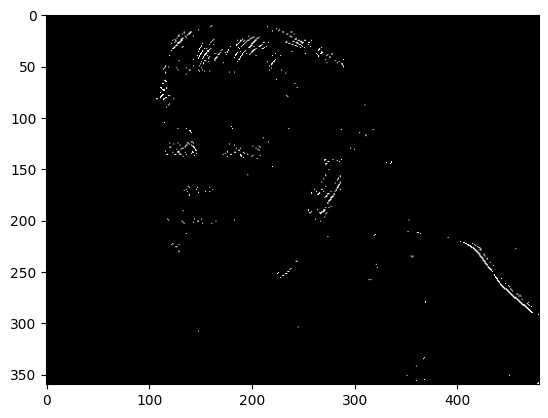

In [42]:
high_img = high_fltr(img, 0.1, 20)  # ???
inout.show_jpg(high_img)